# Rede Neural para Acidentes em uma Usina Nuclear - Sem ruído

## Bibliotecas usadas na implementação da rede

In [ ]:
import numpy as np # será usada para mexer com vetores e matrizes
import pandas as pd # será usada para mexer com o arquivo Excel
import matplotlib.pyplot as plt # será usada para mostrar os gráficos desejados
from sklearn.preprocessing import MinMaxScaler # será usada para normalizar os dados do Excel
from sklearn.model_selection import train_test_split # será usada para dividir o conjunto de dados do arquivo Excel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score # será usada para analisar o            
                                                                                                        # funcionamento da rede
from tensorflow import random 
from tensorflow.keras import layers, models, optimizers # será usada na construção da rede

############Setando Semente Randomica
seed = 1
np.random.seed(seed)
random.set_seed(seed)

## Abrindo o arquivo Excel para leitura

In [ ]:
dados = pd.read_excel("/content/sample_data/16_operational_scenarios.xlsx")

## Selecionando os dados de entrada/saída

In [ ]:
entradas = dados.iloc[:,0:17]
saidas = dados.iloc[:,-1]

## Selecionando os dados que serão usados para treinamento, teste e validação

In [ ]:
entradasTreino, entradasTeste, saidasTreino, saidasTeste = train_test_split(entradas, saidas, test_size=0.05)
entradasTreino, entradasValid, saidasTreino, saidasValid = train_test_split(entradasTreino, saidasTreino, test_size=0.05)

## Normalizando os dados de entrada

In [ ]:
normalizer = MinMaxScaler(feature_range = (0, 1))
entradasTreino = normalizer.fit_transform(entradasTreino)
entradasValid = normalizer.transform(entradasValid)
entradasTeste = normalizer.transform(entradasTeste)

## Definindo as quantidas de entradas, saídas, neurônios funções de ativação, tipo de otimizador, função erro, tamanho do batch e o número de épocas

In [ ]:
quant_entradas = entradasTreino.shape[1]
quant_saidas = 1
quant_neuronios = 40
funcaoAtivacao = "relu"
funcaoSaida = "linear"
optimizer = optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1E-8, decay=0.0)
funcaoErro ='mse'
batch_size = 50
epochs =  400

## Estrutrando a rede

In [ ]:
model = models.Sequential()

model.add(layers.Dense(quant_neuronios,
                        activation=funcaoAtivacao, 
                        input_dim=quant_entradas))

#Camada Escondida 2
model.add(layers.Dense(quant_neuronios,activation=funcaoAtivacao))
model.add(layers.Dense(quant_neuronios,activation=funcaoAtivacao))
model.add(layers.Dense(quant_neuronios,activation=funcaoAtivacao))
model.add(layers.Dense(quant_neuronios,activation=funcaoAtivacao))
model.add(layers.Dense(quant_neuronios,activation=funcaoAtivacao))

#Camada de Saida
model.add(layers.Dense(quant_saidas,activation=funcaoSaida))

#Resumo do Modelo
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 40)                720       
_________________________________________________________________
dense_50 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_51 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_52 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_53 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_54 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_55 (Dense)             (None, 1)                

## Compilando a rede neural

In [ ]:
model.compile(loss=funcaoErro, optimizer=optimizer)

## Treinando a rede neural

In [ ]:
history = model.fit(entradasTreino, saidasTreino, 
          epochs=epochs, batch_size=batch_size, 
          validation_data=(entradasValid, saidasValid),
          shuffle=True,
          verbose=1)

Epoch 1/400
5/5 [==============================] - 0s 23ms/step - loss: 26.5566 - val_loss: 10.4398
Epoch 2/400
5/5 [==============================] - 0s 5ms/step - loss: 9.4257 - val_loss: 9.1704
Epoch 3/400
5/5 [==============================] - 0s 5ms/step - loss: 5.3513 - val_loss: 2.2042
Epoch 4/400
5/5 [==============================] - 0s 6ms/step - loss: 4.8062 - val_loss: 1.5196
Epoch 5/400
5/5 [==============================] - 0s 5ms/step - loss: 2.8359 - val_loss: 4.7662
Epoch 6/400
5/5 [==============================] - 0s 5ms/step - loss: 3.1148 - val_loss: 1.5819
Epoch 7/400
5/5 [==============================] - 0s 5ms/step - loss: 2.8647 - val_loss: 1.9929
Epoch 8/400
5/5 [==============================] - 0s 5ms/step - loss: 2.8286 - val_loss: 3.3634
Epoch 9/400
5/5 [==============================] - 0s 5ms/step - loss: 2.6224 - val_loss: 1.6447
Epoch 10/400
5/5 [==============================] - 0s 5ms/step - loss: 2.6062 - val_loss: 3.0664
Epoch 11/400
5/5 [========

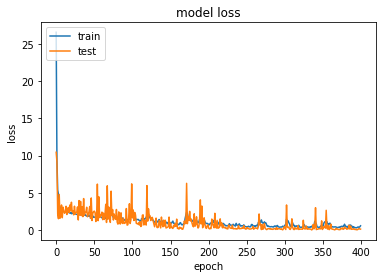

In [ ]:
import matplotlib.pyplot as plt #Para Gerar Plots

plt.plot(history.history['loss'][0:500])
plt.plot(history.history['val_loss'][0:500])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Avaliando a rede neural e comparando as saídas obtidas com as reais

In [ ]:
y_pred = model.predict(entradasTeste)

In [ ]:
print('MAE:', mean_absolute_error(saidasTeste, y_pred))  
print('MSE:', mean_squared_error(saidasTeste, y_pred))  
print('RMSE:', np.sqrt(mean_squared_error(saidasTeste, y_pred)))
print('R2_Score:', r2_score(saidasTeste, y_pred))

MAE: 0.11779944713299091
MSE: 0.03221005936411267
RMSE: 0.17947161158275887
R2_Score: 0.9926834676982056


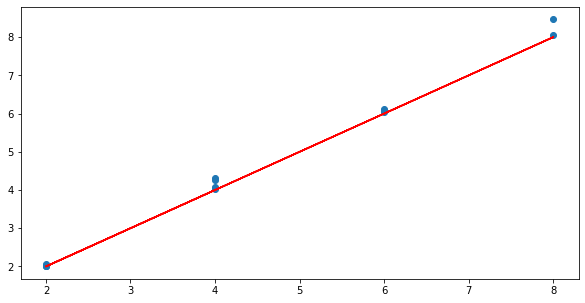

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.scatter(saidasTeste,y_pred)
plt.plot(saidasTeste,saidasTeste,'r')